<a href="https://colab.research.google.com/github/HEMANTHSWAMY26/Industrial-Predictive-Maintenance/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:

# Step 1: Generate synthetic dataset
np.random.seed(42)
data_size = 1000
age = np.random.randint(1, 20, data_size)
temperature = np.random.uniform(50, 150, data_size)
usage = np.random.uniform(100, 1000, data_size)
failure = (0.2 * age + 0.3 * temperature + 0.5 * usage + np.random.normal(0, 50, data_size) > 500).astype(int)

data = pd.DataFrame({
    'Age': age,
    'Temperature': temperature,
    'Usage': usage,
    'Failure': failure
})

In [ ]:

# Step 2: Data preparation
X = data[['Age', 'Temperature', 'Usage']]
y = data['Failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# Step 3: Build a simple neural network
model = Sequential([
    Dense(16, input_dim=3, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

# Step 4: Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=16, verbose=0)

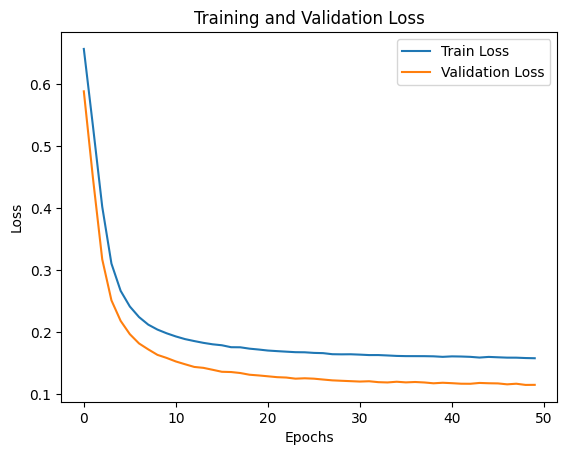

In [ ]:

# Step 5: Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


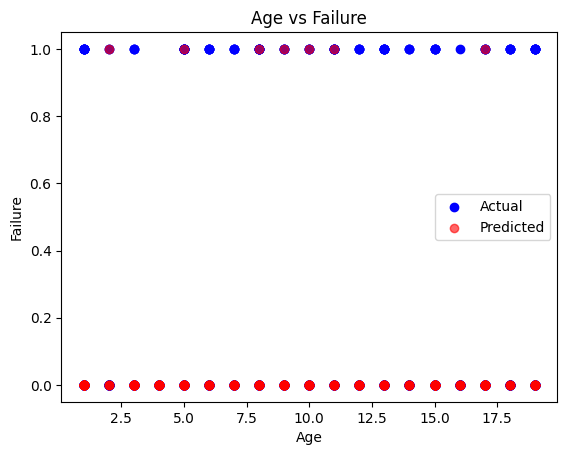

In [ ]:

# Step 6: Predictions
predictions = (model.predict(X_test_scaled) > 0.5).astype(int).flatten()

# Scatter plot for Age vs. Failure
plt.scatter(data['Age'], data['Failure'], c='blue', label='Actual')
plt.scatter(X_test['Age'], predictions, c='red', label='Predicted', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Failure')
plt.title('Age vs Failure')
plt.legend()
plt.show()

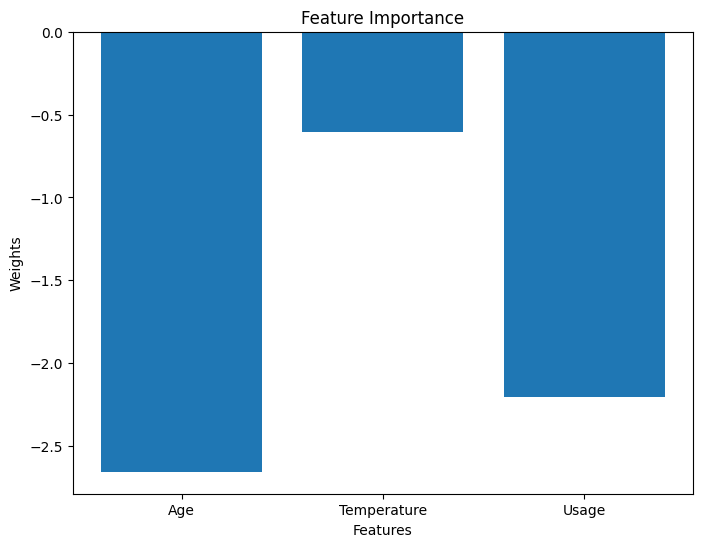

In [ ]:

# Step 7: Display feature correlation
plt.figure(figsize=(8, 6))
plt.bar(X.columns, model.get_weights()[0].sum(axis=1))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.show()